# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

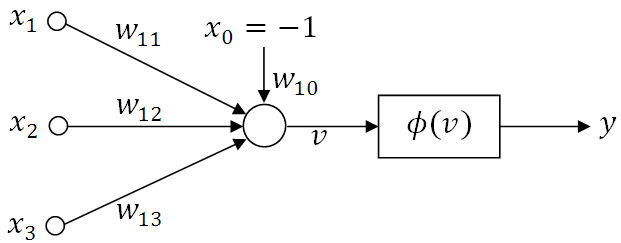

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [1]:
import numpy as np
import math

def step_function(x):
    if x >=0:
        return 1
    else: 
        return 0

def ramp_function(x):
    if x >=0:
        return x
    else:
        return 0
def sigmoid_function(x, a=1):
    return 1 / (1 + math.exp(-x * a))

def neuron(x, w, activation):
    # Compute the dot product
    scalar_product = np.dot(x, w)
    neuron_output = activation(scalar_product)
    return neuron_output

**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [2]:
w = np.random.rand(4)

x1= [-1,0.5,1,0.7]
x2= [-1,0,0.8,0.2]

#neuron output for input vector x1
print(neuron(x1,w,step_function))
print(neuron(x1,w,ramp_function))
print(neuron(x1,w,sigmoid_function))

#neuron output for input vector x2
print(neuron(x2,w,step_function))
print(neuron(x2,w,ramp_function))
print(neuron(x2,w,sigmoid_function))

1
0.7142273234587165
0.6713345699988337
1
0.0402990206147493
0.5100733919155931


## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

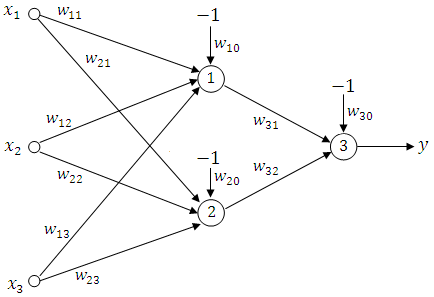

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [3]:
def three_neuron_network(x):
    w1=[1,0.5,1,-0.4]
    w2=[0.5,0.6,-1.5,-0.7]
    w3=[-0.5,-1.5,0.6]
    
    #adding x0=1 to input vector
    x0 = -1
    x.insert(0,x0)
    
    output_neuron_1 = neuron(x,w1,sigmoid_function)
    output_neuron_2 = neuron(x,w2,sigmoid_function)
    
    first_hidden_layer_x=[]
    first_hidden_layer_x.append(x0)
    first_hidden_layer_x.append(output_neuron_1)
    first_hidden_layer_x.append(output_neuron_2)
    
    output_neuron_3=neuron(first_hidden_layer_x,w3,sigmoid_function)
    return output_neuron_3
    

**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?

In [4]:
x=[0.3,0.7,0.9]
three_neuron_network(x)

0.5021828523608841

Output of the network depend on neuron weights. The weights in a neural network determines how the network transforms input data to produce output.

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

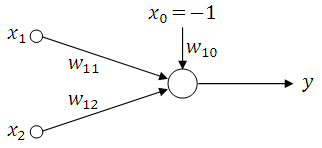

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


Learning Rate: 0.01, MSE: 0.009998560416841754, Iterations: 6461
Learning Rate: 0.05, MSE: 0.009996845394601099, Iterations: 1311
Learning Rate: 0.1, MSE: 0.00998922984504464, Iterations: 649


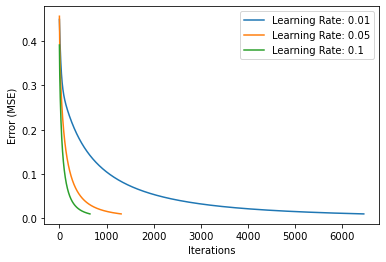

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x1 = [-1, 0, 0]
x2 = [-1, 0, 1]
x3 = [-1, 1, 0]
x4 = [-1, 1, 1]

d = [0, 0, 0, 1]

examples = [x1, x2, x3, x4]



learning_rates = [0.01, 0.05, 0.1]
error_history = []

for study_rate in learning_rates:
    w = np.random.rand(3)  # Reset weights for each learning rate
    mse = float("inf")
    iteration = 0
    error_list = []

    while mse > 0.01:
        e = []  # Clear the error list in each iteration
        for x_i, d_i in zip(examples, d):
            y_i = neuron(x_i, w, sigmoid_function)
            e_i = d_i - y_i
            e.append(e_i)
            w[0] = w[0] + (study_rate * x_i[0] * e_i)
            w[1] = w[1] + (study_rate * x_i[1] * e_i)
            w[2] = w[2] + (study_rate * x_i[2] * e_i)

        squared_errors = [i ** 2 for i in e]
        mse = sum(squared_errors) / 2
        error_list.append(mse)
        iteration += 1

    print(f"Learning Rate: {study_rate}, MSE: {mse}, Iterations: {iteration}")
    error_history.append(error_list)

# Plot error function
for i, study_rate in enumerate(learning_rates):
    plt.plot(range(len(error_history[i])), error_history[i], label=f'Learning Rate: {study_rate}')

plt.xlabel('Iterations')
plt.ylabel('Error (MSE)')
plt.legend()
plt.show()





The best learning rate is 0.01. A small learning rate provides stability but results in slow learning; on the other hand, a large learning rate accelerates learning but comes with the risk of instability.

I have defined a sufficiently small error, knowing that a smaller MSE indicates that the model's predictions are closer to the target values.

When I used a learning rate of 0.1, my algorithm terminated after 649 iterations. Using a learning rate of 0.05, the algorithm terminated after 1311 iterations, and when using a learning rate of 0.01, the algorithm terminated after 6461 iterations.

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [10]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [11]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [12]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [13]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?

In [18]:
# Write your code here
keys = [a1,a2,a3,a4]

for key in keys:
    b_i = char(M@key)
    print(f"For key: {key} corresponding output is word {b_i}\n")

For key: [[1]
 [0]
 [0]
 [0]] corresponding output is word vrat

For key: [[0]
 [1]
 [0]
 [0]] corresponding output is word kraj

For key: [[0]
 [0]
 [1]
 [0]] corresponding output is word cres

For key: [[0]
 [0]
 [0]
 [1]] corresponding output is word otac



All input-output pairs were memorized correctly.

If the 𝑎𝑖 vectors were not normalized, you would still be able to memorize all 4 input-output pairs because of the linear independence and orthonormality of the 𝑎𝑖 vectors.

### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [21]:
a5 = (a1 + a3) / np.sqrt(2)
print(a5)

[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]


Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [22]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

In [23]:
# Write your code here
keys = [a1,a2,a3,a4,a5]
expected_output = [b1,b2,b3,b4,b5]

for key,output in zip(keys,expected_output):
    b_i = char(M_five@key)
    print(f"For key: {key} corresponding output is word {b_i}. Association {'IS properly' if char(output)==b_i else 'IS NOT properly'} memorized")

For key: [[1]
 [0]
 [0]
 [0]] corresponding output is word ÃÂ¥¿. Association IS NOT properly memorized
For key: [[0]
 [1]
 [0]
 [0]] corresponding output is word kraj. Association IS properly memorized
For key: [[0]
 [0]
 [1]
 [0]] corresponding output is word °Â©¾. Association IS NOT properly memorized
For key: [[0]
 [0]
 [0]
 [1]] corresponding output is word otac. Association IS properly memorized
For key: [[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]] corresponding output is word ĆēíĎ. Association IS NOT properly memorized


The new association for the word 'mrak' appears be improperly memorized.

The other associations for the words 'kraj' and 'otac' seem to be properly memorized, as the corresponding outputs match the expected words. Regarding the associations for 'vrat' and 'cres,' they also seem to be improperly memorized, as the corresponding outputs do not match the expected words.

The reason why some associations are not memorized correctly is likely due to the fact that the newly added vector 'a5' is not orthogonal to the previous vectors 'a1,' 'a2,' 'a3,' and 'a4.' In this memory system, using orthogonal (orthonormalized) vectors is crucial to ensure that associations are memorized correctly without interference.

### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [24]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

In [25]:
# Write your code here
keys_2 = [a1,a2,a3,a4]
expected_output_2 = [b1,b2,b3,b4]

for key,output in zip(keys_2,expected_output_2):
    b_i = char(M@key)
    print(f"For key: {key} corresponding output is word {b_i}. Association {'IS properly' if char(output)==b_i else 'IS NOT properly'} memorized")


ValueError: chr() arg not in range(0x110000)

We have problem with converting integer to coresponding Unicode: ValueError: chr() arg not in range 0x110000," suggests that the chr() function was called with an argument that exceeds the valid Unicode code point range.

The input vectors are nowhere near normalized and I have to normalize input vectors to solve this error and answer the following questions.


### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [26]:
A=np.hstack([a1, a2, a3, a4])

After this step we perform the orthonormalization step:

In [27]:
from scipy.linalg import orth
C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [28]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T


In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [29]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
2. How many pairs were correctly memorized?
3. What can we expect when normalizing the vectors?
4. What can we expect when only orthogonalizing the vectors?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?

In [30]:
# Write your code here
keys_3 = [c1,c2,c3,c4]
expected_output_3 = [b1,b2,b3,b4]

for key,output in zip(keys_3,expected_output_3):
    b_i = char(M@key)
    print(f"For key: {key} corresponding output is word {b_i}. Association {'IS properly' if char(output)==b_i else 'IS NOT properly'} memorized")


For key: [[-0.50594743]
 [ 0.14847022]
 [-0.77925491]
 [-0.33872641]] corresponding output is word vrat. Association IS properly memorized
For key: [[-0.50939047]
 [-0.83525837]
 [ 0.19795538]
 [-0.06065043]] corresponding output is word kraj. Association IS properly memorized
For key: [[-0.50546797]
 [ 0.25257838]
 [ 0.01775974]
 [ 0.8248581 ]] corresponding output is word cres. Association IS properly memorized
For key: [[-0.47858195]
 [ 0.46530012]
 [ 0.59435684]
 [-0.44854773]] corresponding output is word otac. Association IS properly memorized


The effect of vector orthonormalization is to ensure that the vectors are orthogonal  to each other and have a length of 1. When the input patterns are orthogonal, a correlation matrix used as an associative memory can yield better results.

All pairs were correctly memorized.

When normalizing the vectors, you can expect that their unit lenght will be 1 , but they may not necessarily be orthogonal to each other.

If you only orthogonalize the vectors, they will be orthogonal to each other, but their lengths may not be 1. This means that the dot product between these vectors will be 0 and it can be useful when magnitude is important. 

Linearly independent vectors can still form a basis for a vector space, their lack of orthogonality can introduce challenges in the context of associative memory. It can lead to interference and reduced discriminability.

### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [31]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.

In [32]:
# Write your code here
# Write your code here
keys_4 = [a1,a2,a3,a4]
expected_output_4 = [b1,b2,b3,b4]

for key,output in zip(keys_4,expected_output_4):
    b_i = char(M@key)
    print(f"For key: {key} corresponding output is word {b_i}. Association {'IS properly' if char(output)==b_i else 'IS NOT properly'} memorized")


For key: [[114]
 [117]
 [107]
 [ 97]] corresponding output is word uq`s. Association IS NOT properly memorized
For key: [[107]
 [115]
 [101]
 [116]] corresponding output is word jq`i. Association IS NOT properly memorized
For key: [[109]
 [111]
 [114]
 [101]] corresponding output is word bqdr. Association IS NOT properly memorized
For key: [[109]
 [ 97]
 [109]
 [ 97]] corresponding output is word ns`b. Association IS NOT properly memorized


 None of the associations were properly memorized

### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [33]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
2. If not, what is the error between expected and obtained values?

In [34]:
# Write your code here
keys_5 = [a1,a2,a3,a4,a5]
expected_output_5 = [b1,b2,b3,b4,b5]
for key, output in zip(keys_5, expected_output_5):
    b_i = char(M @ key)
    print(f"For key: {key} corresponding output is word {b_i}")

# Print the total error
error = np.linalg.norm(B - M @ A)
print(f"Total Error: {error}")

For key: [[1]
 [0]
 [0]
 [0]] corresponding output is word faQ`
For key: [[0]
 [1]
 [0]
 [0]] corresponding output is word kraj
For key: [[0]
 [0]
 [1]
 [0]] corresponding output is word SaU_
For key: [[0]
 [0]
 [0]
 [1]] corresponding output is word otac
For key: [[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]] corresponding output is word v
Total Error: 67.92961576468043


No, not all pairs were memorized correctly. Two pairs "kset-kraj" and "mama-otac" were memorized correctly, but the other pairs had errors in their associations.

The errors between the expected and obtained values is 67.92961576468043


## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [39]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [40]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [41]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [42]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [43]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [44]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

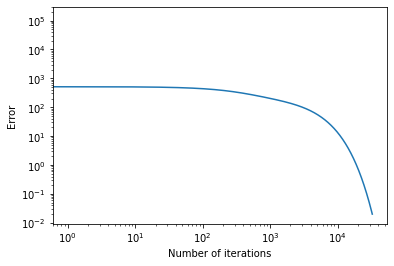

In [45]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

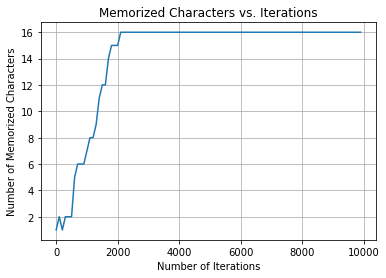

In [48]:
# Write your code here
# Initialize the matrix M with random values
M = np.random.rand(4, 4) - 0.5
# Initialize variables to keep track of memorized characters and iterations
iterations = [] 
memorized_characters = [] 

for max_num_iter in range(1, 10001, 100):  # Vary max_num_iter
    M, e = trainlms(A, B, M, ni, max_num_iter)
    correct_reconstructions = np.round(M @ A) == B
    num_correct = np.sum(correct_reconstructions)
    iterations.append(max_num_iter)
    memorized_characters.append(num_correct)

# Plot the graph
plt.plot(iterations, memorized_characters)
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Memorized Characters")
plt.title("Memorized Characters vs. Iterations")
plt.grid()
plt.show()

After around 2000 iterations, the algorithm has memorized all 4 characters.

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [49]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

In [50]:
# Write your code here
# Create vectors for 'auto' and 'mrak'
a5 = real("auto") 
b5 = real("mrak")
# Extend the existing matrices A and B to include the new vectors
A = np.hstack([A, a5])
B = np.hstack([B, b5])
print(A)

[[114 107 109 109  97]
 [117 115 111  97 117]
 [107 101 114 109 116]
 [ 97 116 101  97 111]]


In [51]:
# Initialize the matrix M with random values for the expanded dimensions
M = np.random.rand(4, 4) - 0.5
print(M)

[[ 0.25074592  0.01115467 -0.02635031  0.32988724]
 [ 0.00688285 -0.12672832  0.22226769 -0.40699733]
 [-0.03006353  0.1190077  -0.40651255 -0.19138784]
 [ 0.42010227 -0.37952377  0.21824282 -0.33737408]]


Use the *trainlms* function in the following way:

In [52]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)
print(np.sum(np.round(np.dot(M, A))==B))
print(e[-1])

2
219.79844711685453


**Tasks**

1. How many iterations did you use?
2. How many characters were memorized correctly?
3. What is the SSE error?
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)

I have used 100000 iterations

2 characters were memorized correctly

SSE error is 219.79844711685456.

If I call the function from the beginning, I'll reinitialize the matrix M with random values and train the network again. This will reset the learning process.

2 characters were memorized correctly and mistake is 219.79844711685456. If the initial values of M are significantly different, the network may require more iterations to converge, and the memorization results may differ.

Whether the network can memorize all five associations depends on the linear independence of the input vectors and the capacity of the network. If the input vectors are linearly independent, and the network has enough capacity, it may be possible to memorize all five associations. However, if the input vectors are not linearly independent or the network's capacity is insufficient, it might not be possible to memorize all associations. The capacity of the network is determined by the number of dimensions in the correlation matrix M. If the number of associations exceeds the network's capacity, it may not be possible to perfectly memorize all of them. The training process may also be affected by issues like local minimum and numerical stability.